# Import modelflow

In [2]:
from modelclass import model
model.widescreen()

# Load model and data, and run 

In [3]:
masia,baseline = model.modelload('asia.pcim',run=1,silent=1)

# Make experiment with Cambodia

In [24]:
altdf = baseline.copy()
altdf.loc[2021:2021,'KHM_GCARBR_A'] = altdf.loc[2021:2021,'KHM_GCARBR_A'] + 20  
for exovar in 'KHM_PREM KHM_EXPE KHM_EXPH KHM_EXPSP KHM_OGC KHM_OGI'.split():
        altdf.loc[2021:2050,exovar+'_D'] = 1
        altdf.loc[2021:2050,exovar+'_X'] = altdf.loc[2021:2050,exovar]
        

altres = masia(altdf,2021,2050,silent=0,first_test = 4,ljit=1)

Will start solving: Asia


Compile prolog: 100%|███████████████████████████████████████████| 89/89  6.61s/code chunk
Compile core  : 100%|███████████████████████████████████████████| 57/57 12.54s/code chunk
Compile epilog:  21%|█████████                                  | 14/66  9.39s/code chunk<string>:5584: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "epilog14" failed type inference due to: Untyped global name 'qgamma': Cannot determine Numba type of <class 'function'>

File "<string>", line 5595:
<source missing, REPL/exec in use?>

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog14" was compiled in object mode without forceobj=True.

File "<string>", line 5584:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog20" was compiled in object mode without forceobj=True.

File "<string>", line 5788:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<string>", line 5788:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaDeprecationWarning(msg,
Compile epilog:  32%|█████████████▋                             | 21/66 12.94s/code chunk<string>:5822: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function 

Compile epilog: 100%|███████████████████████████████████████████| 66/66 18.74s/code chunk
<string>:7337: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "epilog" failed type inference due to: Invalid use of type(CPUDispatcher(<function make_los.<locals>.epilog14 at 0x0000018B41BDC160>)) with parameters (array(float64, 2d, A), array(float64, 2d, A), int64, alfa=float64)

During: resolving callee type: type(CPUDispatcher(<function make_los.<locals>.epilog14 at 0x0000018B41BDC160>))
During: typing of call at <string> (7353)


File "<string>", line 7353:
<source missing, REPL/exec in use?>

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog" was compiled in object mode without forceobj=True.

File "<string>", line 7337:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.p

2021 Solved in 10 iterations
2022 Solved in 10 iterations
2023 Solved in 10 iterations
2024 Solved in 10 iterations
2025 Solved in 10 iterations
2026 Solved in 10 iterations
2027 Solved in 10 iterations
2028 Solved in 10 iterations
2029 Solved in 10 iterations
2030 Solved in 10 iterations
2031 Solved in 10 iterations
2032 Solved in 10 iterations
2033 Solved in 10 iterations
2034 Solved in 10 iterations
2035 Solved in 11 iterations
2036 Solved in 11 iterations
2037 Solved in 11 iterations
2038 Solved in 15 iterations
2039 Solved in 15 iterations
2040 Solved in 15 iterations
2041 Solved in 15 iterations
2042 Solved in 15 iterations
2043 Solved in 15 iterations
2044 Solved in 15 iterations
2045 Solved in 15 iterations
2046 Solved in 15 iterations
2047 Solved in 15 iterations
2048 Solved in 15 iterations
2049 Solved in 15 iterations
2050 Solved in 15 iterations
Asia solved  


# Display the impact

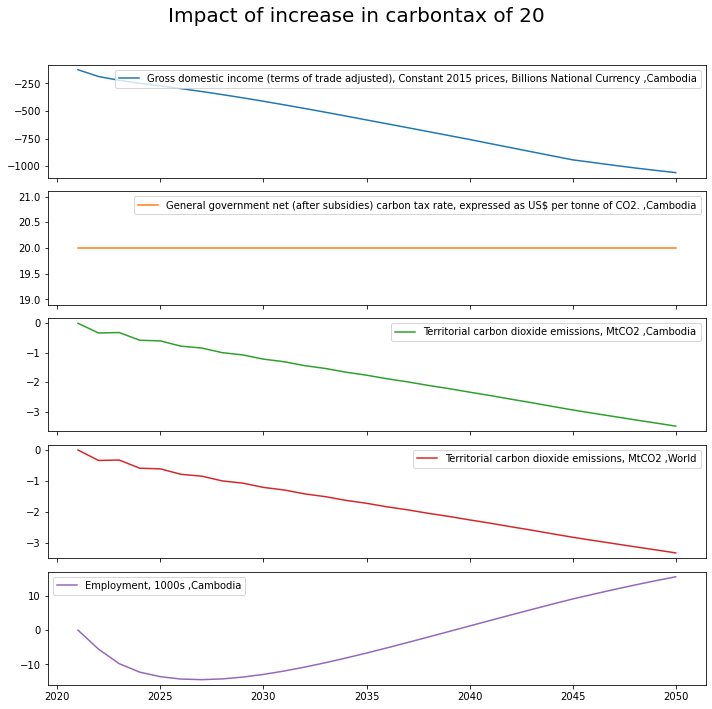

In [25]:
masia['KHM_GDI KHM_GCARBR KHM_CO2 WLD_CO2 KHM_LNN'].dif.rename().plot(colrow=1,sharey=0,title='Impact of increase in carbontax of 20');

# Define the same esperiment for several countries.
This is just an example, will be wrapped in function later

In [29]:
countries = 'KHM IDN MYS'.split()
altdf = baseline.copy()
for country in countries:
    altdf.loc[2021:2021,country+'_GCARBR_A'] = altdf.loc[2021:2021,country+'_GCARBR_A'] + 20  
    for exovar in 'PREM EXPE EXPH EXPSP OGC OGI'.split():
            altdf.loc[2021:2050,country+'_'+exovar+'_D'] = 1
            altdf.loc[2021:2050,country+'_'+exovar+'_X'] = altdf.loc[2021:2050,country+'_'+exovar]
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=1)

outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = ' '.join(country+'_'+var for country in countries for var in outvar)+' WLD_CO2'

Wall time: 954 ms


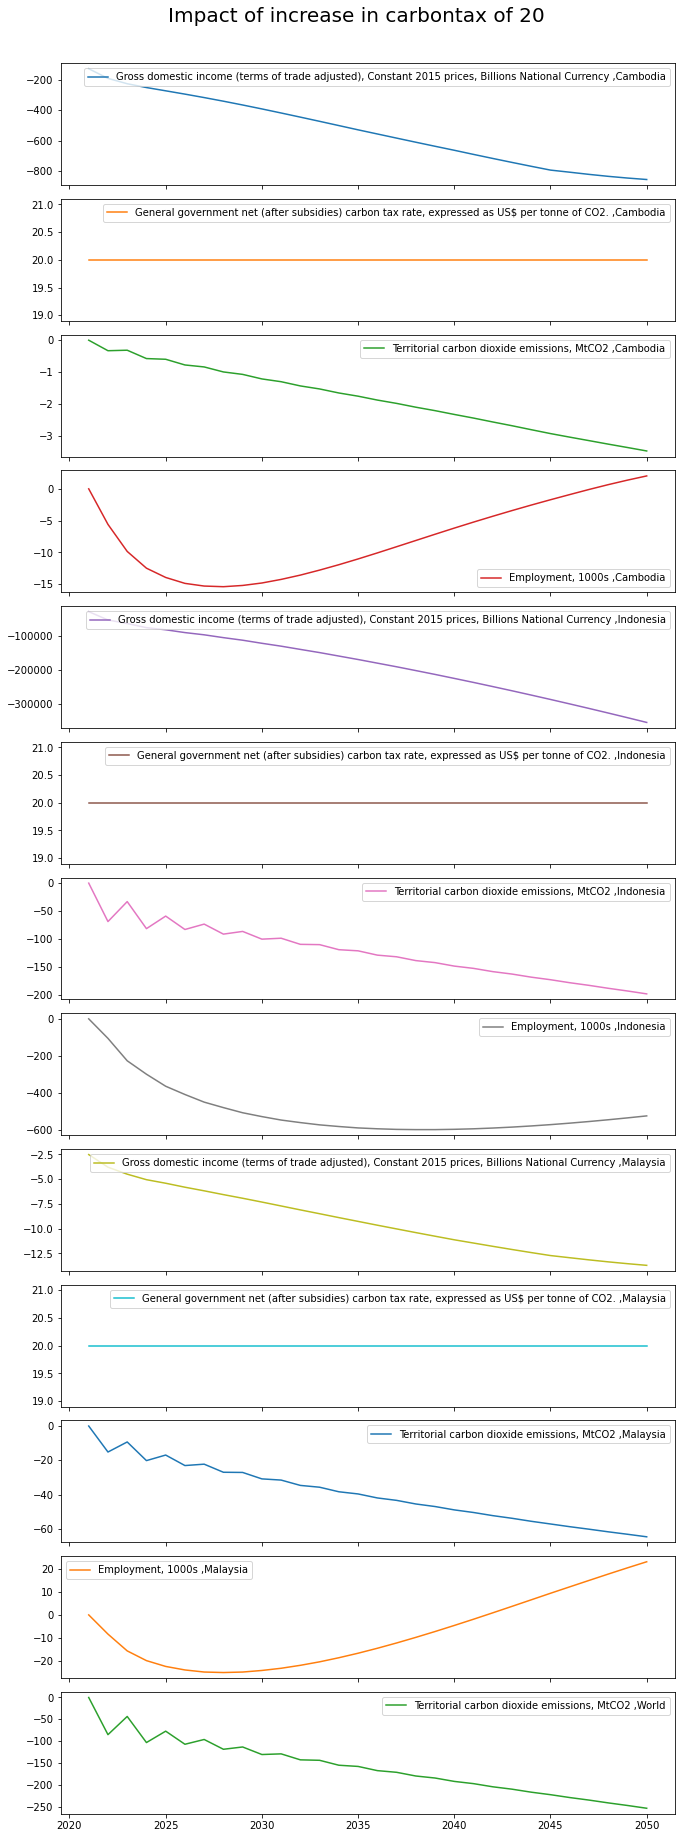

In [7]:
masia[displayvar].dif.rename().plot(colrow=1,sharey=0,top=0.95,title='Impact of increase in carbontax of 20');

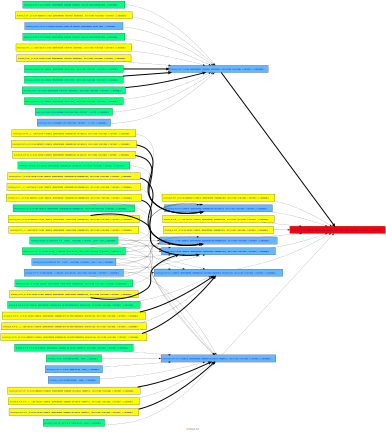

In [35]:
masia.khm_exp.tracepre(up=2,HR=0)

In [37]:
masia.khm_gip

Endogeneous: KHM_GIP: Gross government interest payments, Billions National Currency ,Cambodia 
Formular: FRML <Z,EXO> KHM_GIP =( (KHM_GIP(-1)+(KHM_GDN(-1)-KHM_GDN(-2))*KHM_GINT(-1)/100+KHM_GDN(-6)/5*(KHM_GINT(-1)/100-KHM_GINT(-6)/100))*(KHM_GDFXSH*(KHM_EXR/KHM_EXR(-1))+(1-KHM_GDFXSH)) + KHM_GIP_A )*(1-KHM_GIP_D)+KHM_GIP_X*KHM_GIP_D$

KHM_GIP   : Gross government interest payments, Billions National Currency ,Cambodia
KHM_EXR   : Exchange rate (national currency / US$) ,Cambodia
KHM_GDFXSH: Foreign currency share of general government gross debt ,Cambodia
KHM_GDN   : General government gross debt, Billions National Currency ,Cambodia
KHM_GINT  : General government average interest rate on outstanding debt ,Cambodia
KHM_GIP_A : Add factor:Gross government interest payments, Billions National Currency ,Cambodia
KHM_GIP_D : Exo dummy:Gross government interest payments, Billions National Currency ,Cambodia
KHM_GIP_X : Exo value:Gross government interest payments, Billions National Currency

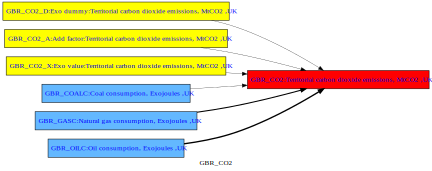

In [9]:
masia.GBR_CO2.tracepre(HR=0,up=1)  

In [30]:
experiments = {country : country+'_GCARBR_A' for country in countries}
experiments

{'KHM': 'KHM_GCARBR_A', 'IDN': 'IDN_GCARBR_A', 'MYS': 'MYS_GCARBR_A'}

In [31]:
from modeldekom import totdif

In [33]:
xx = totdif(masia,summaryvar=displayvar,experiments = experiments)


Total dekomp took       :         2.740 Seconds


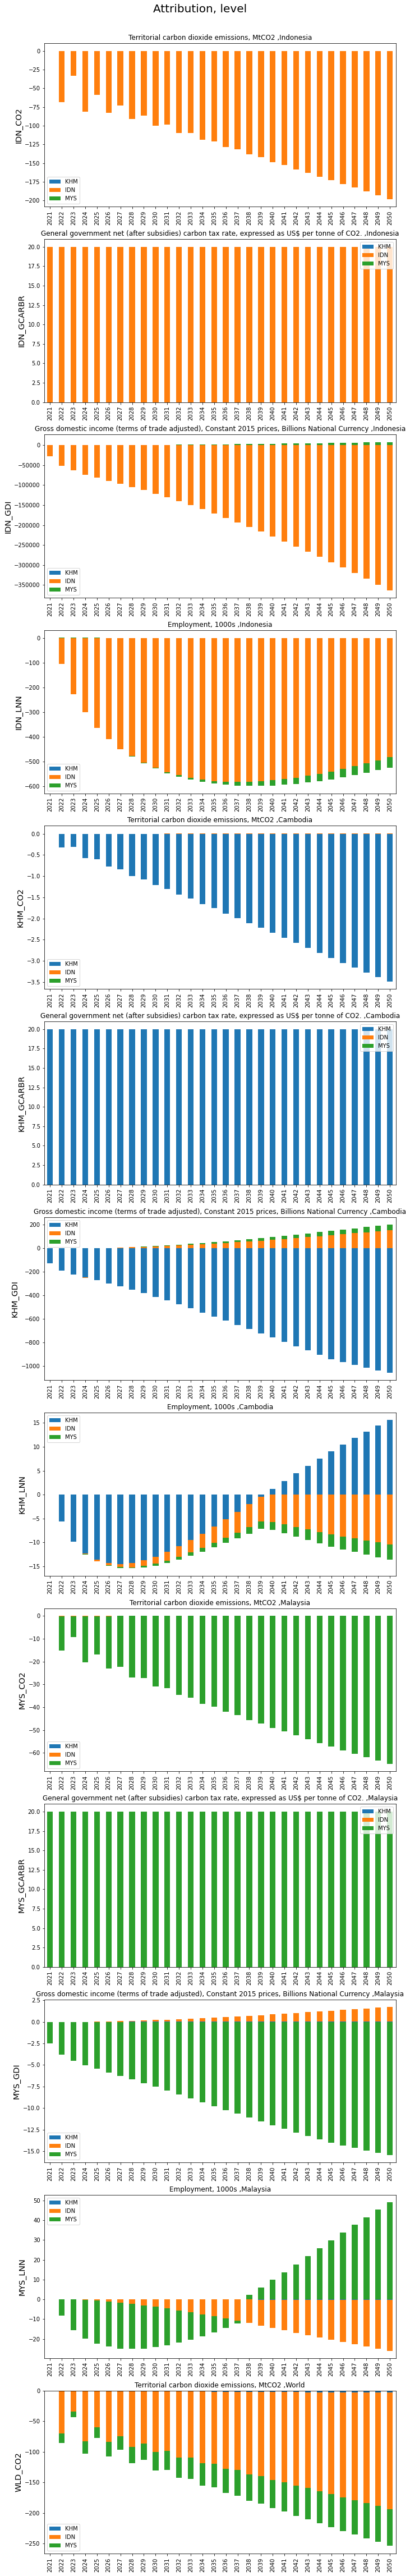

In [15]:
xx.desdic = masia.var_description
fig = xx.explain_all(displayvar,top=0.965);

In [14]:
fig.savefig('experiment.pdf')

In [23]:
all(baseline.dtypes=='float64')


True